In [1]:
import numpy as np
import pandas as pd
import regex as re

### check which model fit best for each subject

In [5]:
import os

files = os.listdir('./data/fr/')

# print(files)

foi = []
for file in files:
    if file.endswith(".json") & file.startswith("fr100_fit"):
        foi.append(os.path.join("./data/fr/", file))
    else:
        continue

print(foi)

['./data/fr/fr100_fit_combi_signed_ev_col_congr.json', './data/fr/fr100_fit_combi_signed_ev_subj_lied.json', './data/fr/fr100_fit_signed_ev_colcongr_subjlied.json', './data/fr/fr100_fit_sig_col_count.json', './data/fr/fr100_fit_sig_ev_noup.json', './data/fr/fr100_fit_sig_ev_up.json', './data/fr/fr100_fit_unsig_col_count.json', './data/fr/fr100_fit_unsig_ev_noup.json', './data/fr/fr100_fit_unsig_ev_up.json', './data/fr/fr100_fit_weighted_sigev_sigcolourt.json']


In [7]:
len(foi)

10

In [88]:
# get all DF filenames from data/fr folder

def data_to_df(files: list):
    ''' provide list of json data file pathnames '''
    dfs = {}  # features of interest
    for path in files:
        try:
            print(path)
            df = pd.read_json(path)
            model = re.findall(r'(?<=fr100_fit_).*(?=\.json)', path)[0]
            dfs[model] = df.transpose()['BIC']
        except PermissionError:
            continue
    return dfs

In [89]:
dfs = data_to_df(foi)

./data/fr/fr100_fit_combi_signed_ev_col_congr.json
./data/fr/fr100_fit_combi_signed_ev_subj_lied.json
./data/fr/fr100_fit_signed_ev_colcongr_subjlied.json
./data/fr/fr100_fit_sig_col_count.json
./data/fr/fr100_fit_sig_ev_noup.json
./data/fr/fr100_fit_sig_ev_up.json
./data/fr/fr100_fit_unsig_col_count.json
./data/fr/fr100_fit_unsig_ev_noup.json
./data/fr/fr100_fit_unsig_ev_up.json
./data/fr/fr100_fit_weighted_sigev_sigcolourt.json


In [90]:
len(dfs)

10

In [97]:
uuids = dfs['combi_signed_ev_col_congr'].index

In [100]:
dfs

{'combi_signed_ev_col_congr': 56210effed6e5a000ac7f3a5   -316.481035
 57313ba2070de6000f43384e   -369.723659
 5af196e1e1b5b8000148ac76   -292.532291
 5cd5fe480f0de600018e7251   -415.486621
 5fec7577ad8fbadf15cd5607   -261.693394
                                ...    
 61661cac7d3cc02b3fc1b52b   -602.483179
 61671a9d42eb53946faa44c2   -705.269624
 616ec0185d61b5fa0b62b42a   -642.127387
 616f35805cb9047a629edb71   -468.139772
 61702b890e755075af3a5423   -886.467004
 Name: BIC, Length: 100, dtype: float64,
 'combi_signed_ev_subj_lied': 56210effed6e5a000ac7f3a5   -318.117987
 57313ba2070de6000f43384e   -367.509404
 5af196e1e1b5b8000148ac76   -294.140974
 5cd5fe480f0de600018e7251   -414.664458
 5fec7577ad8fbadf15cd5607   -259.335202
                                ...    
 61661cac7d3cc02b3fc1b52b   -599.474451
 61671a9d42eb53946faa44c2   -630.555258
 616ec0185d61b5fa0b62b42a   -639.793617
 616f35805cb9047a629edb71   -480.419118
 61702b890e755075af3a5423   -885.006242
 Name: BIC, Length: 1

In [108]:
best_model = {}

for uuid in uuids:
    tmp = []
    for i, model in enumerate(dfs):
        tmp.append(dfs[model][uuid])
    best_model[uuid] = list(dfs)[np.argmin(tmp)]

In [115]:
pd.Series(best_model).to_clipboard()

In [3]:
df = pd.read_feather("./data/fr/fr100_aggregate_scores.feather")

In [4]:
df = df.set_index('PID')

In [122]:
df['best_model_fit'] = pd.Series(best_model)

In [123]:
df

,crt,aq,lie_prop,eq,rgpts,signed_ev_alpha,col_congruency_alpha,signed_ev_prior,mean_honesty_rating,lie_detect_precision,lie_detect_recall,lie_detect_accuracy,age,gender,ed_lev,high_liar,high_alpha,high_col_congruency_alpha,high_prior,best_model_fit
PID,,,,,,,,,,,,,,,,,,,,
56210effed6e5a000ac7f3a5,4,0.2,0.622222,5.181818,1.777778,0.549441,0.022603,0.324423,1.455556,0.391892,0.966667,0.488889,38,0,5,True,1,1,1,sig_ev_noup
57313ba2070de6000f43384e,3,0.6,0.211111,4.954545,1.944444,0.129086,-0.040522,0.187498,3.755556,0.750000,0.107143,0.711111,38,1,1,True,0,1,1,unsig_ev_noup
5af196e1e1b5b8000148ac76,2,0.4,0.222222,5.136364,2.500000,0.634702,-0.038728,0.051418,2.922222,0.692308,0.692308,0.822222,31,0,9,True,1,1,0,unsig_ev_noup
5cd5fe480f0de600018e7251,1,0.3,0.411111,4.681818,2.722222,0.402318,-0.022349,0.105137,3.400000,0.000000,0.000000,0.855556,28,1,3,True,1,1,0,sig_ev_noup
5fec7577ad8fbadf15cd5607,4,0.2,0.233333,4.500000,NaN,0.356174,-0.085010,0.108129,3.755556,0.230769,0.272727,0.800000,25,0,6,True,0,0,0,unsig_ev_noup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61661cac7d3cc02b3fc1b52b,1,0.4,0.244444,5.909091,0.888889,0.651838,-0.138006,0.000000,3.422222,0.454545,0.500000,0.755556,47,1,5,True,1,0,0,signed_ev_colcongr_subjlied
61671a9d42eb53946faa44c2,2,0.5,0.088889,4.318182,0.722222,0.129569,-0.218272,0.434725,3.055556,0.406250,0.520000,0.655556,40,0,5,False,0,0,1,signed_ev_colcongr_subjlied
616ec0185d61b5fa0b62b42a,4,0.2,0.000000,5.000000,0.777778,0.584536,-0.031980,0.000000,3.288889,0.560000,0.583333,0.766667,58,1,6,False,1,1,0,combi_signed_ev_col_congr


In [125]:
from collections import Counter

Counter(df['best_model_fit'])

Counter({'sig_ev_noup': 18,
         'unsig_ev_noup': 13,
         'unsig_col_count': 3,
         'signed_ev_colcongr_subjlied': 11,
         'sig_col_count': 5,
         'combi_signed_ev_col_congr': 37,
         'unsig_ev_up': 1,
         'sig_ev_up': 3,
         'weighted_sigev_sigcolourt': 3,
         'combi_signed_ev_subj_lied': 6})

In [136]:
df.pivot(columns="best_model_fit", values="lie_detect_precision").describe()

best_model_fit,combi_signed_ev_col_congr,combi_signed_ev_subj_lied,sig_col_count,sig_ev_noup,sig_ev_up,signed_ev_colcongr_subjlied,unsig_col_count,unsig_ev_noup,unsig_ev_up,weighted_sigev_sigcolourt
count,37.000000,6.000000,5.000000,18.000000,3.000000,11.000000,3.000000,13.000000,1.000000,3.000000
mean,0.441645,0.350106,0.201180,0.529234,0.232576,0.440785,0.301852,0.477450,0.404762,0.370174
std,0.141387,0.274957,0.154677,0.235797,0.036951,0.169241,0.184620,0.218258,NaN,0.042045
min,0.117647,0.000000,0.000000,0.000000,0.200000,0.190476,0.088889,0.000000,0.404762,0.325000
25%,0.384615,0.190476,0.100000,0.400000,0.212500,0.314171,0.244444,0.406250,0.404762,0.351179
50%,0.435897,0.356667,0.245902,0.500000,0.225000,0.434783,0.400000,0.476190,0.404762,0.377358
75%,0.538462,0.428333,0.260000,0.621032,0.248864,0.575455,0.408333,0.629630,0.404762,0.392761
max,0.800000,0.800000,0.400000,1.000000,0.272727,0.678571,0.416667,0.750000,0.404762,0.408163


In [137]:
tmp = pd.read_feather("./data/fr/fr100_lie_detect_model_optimalprob.feather")

In [141]:
tmp.join(df, on="uuid").to_clipboard()

In [2]:
import pandas as pd

In [2]:
df = pd.read_feather("./data/fr/fr100_aggregate_scores.feather")

In [55]:
with open("./data/fr/fr_batch6_lie_detection_accuracy.json", "r", encoding='utf-8') as f:
    df_liedetect6 = json.load(f)

In [57]:
df_liedetection6 = pd.DataFrame.from_dict(df_liedetect6).transpose()

In [58]:
df_liedetection6

,n_subjective_detection,tp,fp,tn,fn,precision,recall,accuracy,f1,specificity
55b424e1fdf99b526efcf8d0,40.0,17.0,23.0,45.0,5.0,0.425000,0.772727,0.688889,0.548387,0.661765
583accd26ab9a70001e2b5a7,0.0,0.0,0.0,64.0,26.0,0.000000,0.000000,0.711111,0.000000,1.000000
59430640f154200001b509d0,20.0,9.0,11.0,60.0,10.0,0.450000,0.473684,0.766667,0.461538,0.845070
5c47408447aa7b000107b7d7,35.0,10.0,25.0,44.0,11.0,0.285714,0.476190,0.600000,0.357143,0.637681
5c6d6d3481e1d50001627409,11.0,5.0,6.0,57.0,22.0,0.454545,0.185185,0.688889,0.263158,0.904762
5c7af38b670f87001746df79,37.0,5.0,32.0,39.0,14.0,0.135135,0.263158,0.488889,0.178571,0.549296
5ce96c839faf7d0001daf0e6,0.0,0.0,0.0,73.0,17.0,0.000000,0.000000,0.811111,0.000000,1.000000
5eb2e269f78ab109cca0bf0c,16.0,9.0,7.0,65.0,9.0,0.562500,0.500000,0.822222,0.529412,0.902778
5eff0ccd02ed424339bf7a08,31.0,16.0,15.0,57.0,2.0,0.516129,0.888889,0.811111,0.653061,0.791667
600092321467ea1431ac2de9,0.0,0.0,0.0,64.0,26.0,0.000000,0.000000,0.711111,0.000000,1.000000


In [59]:
df_liedetection6['dprime_hits'] = np.where(st.norm.ppf(df_liedetection6['tp']/(df_liedetection6['tp']+df_liedetection6['fn'])) == float('-inf'), st.norm.ppf(1/(df_liedetection6['tp']+df_liedetection6['fn'])), st.norm.ppf(df_liedetection6['tp']/(df_liedetection6['tp']+df_liedetection6['fn'])))

In [60]:
df_liedetection6['dprime_fa'] = np.where(st.norm.ppf(df_liedetection6['fp']/(df_liedetection6['tn']+df_liedetection6['fp'])) == float('-inf'), st.norm.ppf(1/(df_liedetection6['tn']+df_liedetection6['fp'])), st.norm.ppf(df_liedetection6['fp']/(df_liedetection6['tn']+df_liedetection6['fp'])))

In [61]:
df_liedetection6['dprime'] = df_liedetection6['dprime_hits'] - df_liedetection6['dprime_fa']

In [62]:
df_liedetection6

,n_subjective_detection,tp,fp,tn,fn,precision,recall,accuracy,f1,specificity,dprime_hits,dprime_fa,dprime
55b424e1fdf99b526efcf8d0,40.0,17.0,23.0,45.0,5.0,0.425000,0.772727,0.688889,0.548387,0.661765,0.747859,-0.417284,1.165143
583accd26ab9a70001e2b5a7,0.0,0.0,0.0,64.0,26.0,0.000000,0.000000,0.711111,0.000000,1.000000,-1.768825,-2.153875,0.385050
59430640f154200001b509d0,20.0,9.0,11.0,60.0,10.0,0.450000,0.473684,0.766667,0.461538,0.845070,-0.066012,-1.015518,0.949506
5c47408447aa7b000107b7d7,35.0,10.0,25.0,44.0,11.0,0.285714,0.476190,0.600000,0.357143,0.637681,-0.059717,-0.352267,0.292550
5c6d6d3481e1d50001627409,11.0,5.0,6.0,57.0,22.0,0.454545,0.185185,0.688889,0.263158,0.904762,-0.895780,-1.309172,0.413392
5c7af38b670f87001746df79,37.0,5.0,32.0,39.0,14.0,0.135135,0.263158,0.488889,0.178571,0.549296,-0.633640,-0.123882,-0.509758
5ce96c839faf7d0001daf0e6,0.0,0.0,0.0,73.0,17.0,0.000000,0.000000,0.811111,0.000000,1.000000,-1.564726,-2.205811,0.641084
5eb2e269f78ab109cca0bf0c,16.0,9.0,7.0,65.0,9.0,0.562500,0.500000,0.822222,0.529412,0.902778,0.000000,-1.297543,1.297543
5eff0ccd02ed424339bf7a08,31.0,16.0,15.0,57.0,2.0,0.516129,0.888889,0.811111,0.653061,0.791667,1.220640,-0.812218,2.032858
600092321467ea1431ac2de9,0.0,0.0,0.0,64.0,26.0,0.000000,0.000000,0.711111,0.000000,1.000000,-1.768825,-2.153875,0.385050


In [14]:
import json

with open("./data/fr/fr_100_lie_detection_accuracy.json", "r", encoding='utf-8') as f:
    df_liedetect = json.load(f)

In [15]:
df_liedetection = pd.DataFrame.from_dict(df_liedetect).transpose()

In [17]:
df_liedetection

,n_subjective_detection,tp,fp,tn,fn,precision,recall,accuracy,f1,specificity
56210effed6e5a000ac7f3a5,74.0,29.0,45.0,15.0,1.0,0.391892,0.966667,0.488889,0.557692,0.250000
57313ba2070de6000f43384e,4.0,3.0,1.0,61.0,25.0,0.750000,0.107143,0.711111,0.187500,0.983871
5962eb69241f8d0001064bd3,29.0,10.0,19.0,47.0,14.0,0.344828,0.416667,0.633333,0.377358,0.712121
5a455b091950a80001e7c49a,2.0,2.0,0.0,74.0,14.0,1.000000,0.125000,0.844444,0.222222,1.000000
5ac7a7f1f69e940001d999a7,53.0,20.0,33.0,36.0,1.0,0.377358,0.952381,0.622222,0.540541,0.521739
...,...,...,...,...,...,...,...,...,...,...
616f6a2135e569c0b4861b01,1.0,0.0,1.0,69.0,20.0,0.000000,0.000000,0.766667,0.000000,0.985714
61701030a25961434f04b486,61.0,15.0,46.0,26.0,3.0,0.245902,0.833333,0.455556,0.379747,0.361111
617019b7cfb4582eb9443d6e,23.0,12.0,11.0,61.0,6.0,0.521739,0.666667,0.811111,0.585366,0.847222
61702b890e755075af3a5423,73.0,16.0,57.0,13.0,4.0,0.219178,0.800000,0.322222,0.344086,0.185714


In [18]:
df = df.set_index("PID")

In [48]:
df_liedetection['dprime_hits'] = np.where(st.norm.ppf(df_liedetection['tp']/(df_liedetection['tp']+df_liedetection['fn'])) == float('-inf'), st.norm.ppf(1/(df_liedetection['tp']+df_liedetection['fn'])), st.norm.ppf(df_liedetection['tp']/(df_liedetection['tp']+df_liedetection['fn'])))

In [49]:
df_liedetection['dprime_fa'] = np.where(st.norm.ppf(df_liedetection['fp']/(df_liedetection['tn']+df_liedetection['fp'])) == float('-inf'), st.norm.ppf(1/(df_liedetection['tn']+df_liedetection['fp'])), st.norm.ppf(df_liedetection['fp']/(df_liedetection['tn']+df_liedetection['fp'])))

In [51]:
df_liedetection['dprime'] = df_liedetection['dprime_hits'] - df_liedetection['dprime_fa']

In [54]:
df_liedetection.reset_index().to_feather("./data/fr/fr100_lie_detection_accuracy_wdprime.feather")

In [67]:
lie_df = pd.concat([df_liedetection, df_liedetection6])

In [68]:
lie_df.reset_index().to_feather("./data/fr/fr_topup_lie_detection_accuracy.feather")

In [23]:
df = df.join(df_liedetection['specificity'])

In [4]:
df6 = pd.read_feather("./data/fr/fr_batch6_aggregate_scores.feather")

In [21]:
df6 = df6.set_index("PID")

In [25]:
df = pd.concat([df, df6])

## Test group level differences

In [27]:
exclude = [
    "60f44f7a57468d4e9f87fa5b",
"6154284fc5154abb9a264b0c",
"6160403f5164508979e6358d",
"615d9f86fdd5e127d783e850",
"612812ff639db35356dff7c5",
"5962eb69241f8d0001064bd3",
"61617a80475c4e619cbed83e",
"616deadcefd7197b84ab677c",
"616f43682df7bc3f99f95411",
"6162a881b823e80dfcf94792",
"616f6a2135e569c0b4861b01",
"5cb08ecee11a890001a478ad",
"5b2caaa75b5c0900018b4724",
"61702b890e755075af3a5423",
"616ec0185d61b5fa0b62b42a"
]

In [28]:
df = df[~df.index.isin(exclude)]

In [29]:
df.shape

(102, 20)

In [30]:
from scipy.stats import ttest_ind

In [31]:
from statistics import median

In [32]:
df['high_alpha'] = df['signed_ev_alpha'] > median(df['signed_ev_alpha'])

In [33]:
df['high_prior'] = df['signed_ev_prior'] > median(df['signed_ev_prior'])

In [34]:
df['high_liar'] = df['lie_prop'] > median(df['lie_prop'])

In [35]:
df['high_col_congruency_alpha'] = df['col_congruency_alpha'] > median(df['col_congruency_alpha'])

In [210]:
len(df) - sum(df['high_liar'])

52

In [36]:
ttest_ind(df['signed_ev_prior'][df['high_liar'] == 1], df['signed_ev_prior'][df['high_liar'] == 0])

Ttest_indResult(statistic=-0.45643765985120377, pvalue=0.6490651108921466)

In [37]:
ttest_ind(df['signed_ev_alpha'][df['high_liar'] == 1], df['signed_ev_alpha'][df['high_liar'] == 0])

Ttest_indResult(statistic=2.732773170558302, pvalue=0.007427196620643524)

Text(0, 0.5, 'EV sensitivity (alpha)')

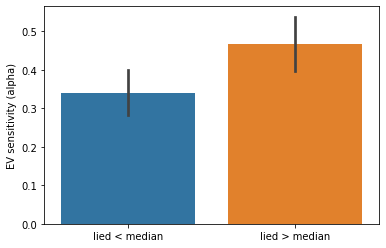

In [239]:
p = sns.barplot(data=df, x="high_liar", y="signed_ev_alpha")
p.set_xlabel("")
p.set_xticklabels(["lied < median", "lied > median"])
p.set_ylabel("EV sensitivity (alpha)")

In [38]:
ttest_ind(df['col_congruency_alpha'][df['high_liar'] == 1], df['col_congruency_alpha'][df['high_liar'] == 0])

Ttest_indResult(statistic=-1.1619772344674155, pvalue=0.24801052747499763)

In [39]:
ttest_ind(df['mean_honesty_rating'][df['high_prior'] == 1], df['mean_honesty_rating'][df['high_prior'] == 0])

Ttest_indResult(statistic=-3.8136482489955528, pvalue=0.00023706135811956078)

Text(0, 0.5, 'mean honesty rating')

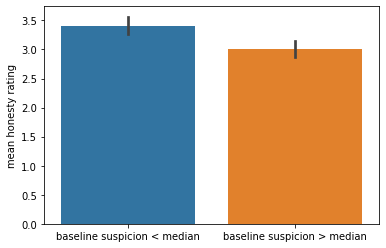

In [243]:
p = sns.barplot(data=df, x="high_prior", y="mean_honesty_rating")
p.set_xlabel("")
p.set_xticklabels(["baseline suspicion < median", "baseline suspicion > median"])
p.set_ylabel("mean honesty rating")

In [40]:
ttest_ind(df['mean_honesty_rating'][df['high_alpha'] == 1], df['mean_honesty_rating'][df['high_alpha'] == 0])

Ttest_indResult(statistic=-1.5985806528880324, pvalue=0.11306884249310915)

In [41]:
ttest_ind(df['mean_honesty_rating'][df['high_col_congruency_alpha'] == 1], df['mean_honesty_rating'][df['high_col_congruency_alpha'] == 0])

Ttest_indResult(statistic=0.2244565907673093, pvalue=0.8228600233993648)

In [42]:
ttest_ind(df['aq'][df['high_prior'] == 1], df['aq'][df['high_prior'] == 0])

Ttest_indResult(statistic=0.5479637146058332, pvalue=0.5849379235635831)

In [43]:
ttest_ind(df['crt'][df['high_prior'] == 1], df['crt'][df['high_prior'] == 0])

Ttest_indResult(statistic=-3.650942876334267, pvalue=0.00041775138492546076)

Text(0, 0.5, 'cognitive reflection')

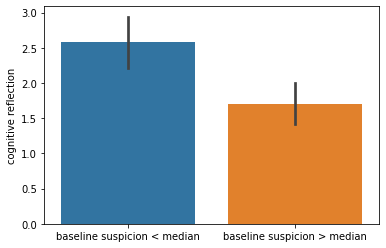

In [245]:
p = sns.barplot(data=df, x="high_prior", y="crt")
p.set_xlabel("")
p.set_xticklabels(["baseline suspicion < median", "baseline suspicion > median"])
p.set_ylabel("cognitive reflection")

In [44]:
ttest_ind(df['rgpts'][df['high_prior'] == 1].notna(), df['rgpts'][df['high_prior'] == 0].notna())

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [45]:
ttest_ind(df['age'][df['high_prior'] == 1], df['age'][df['high_prior'] == 0])

Ttest_indResult(statistic=-1.383753839965339, pvalue=0.16951479157217247)

In [46]:
ttest_ind(df['crt'][df['high_alpha'] == 1], df['crt'][df['high_alpha'] == 0])

Ttest_indResult(statistic=1.1507182723729035, pvalue=0.2525923368062185)

Text(0, 0.5, 'cognitive reflection')

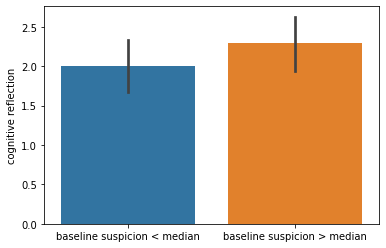

In [246]:
p = sns.barplot(data=df, x="high_alpha", y="crt")
p.set_xlabel("")
p.set_xticklabels(["baseline suspicion < median", "baseline suspicion > median"])
p.set_ylabel("cognitive reflection")

In [47]:
ttest_ind(df['aq'][df['high_alpha'] == 1], df['aq'][df['high_alpha'] == 0])

Ttest_indResult(statistic=0.4381342347711079, pvalue=0.6622339579036659)

In [48]:
ttest_ind(df['eq'][df['high_alpha'] == 1], df['eq'][df['high_alpha'] == 0])

Ttest_indResult(statistic=-0.06280896547707542, pvalue=0.9500439994205347)

In [49]:
ttest_ind(df['eq'][df['high_col_congruency_alpha'] == 1], df['eq'][df['high_col_congruency_alpha'] == 0])

Ttest_indResult(statistic=-0.46527999251745783, pvalue=0.64274262038074)

In [50]:
ttest_ind(df['gender'][df['high_col_congruency_alpha'] == 1], df['gender'][df['high_col_congruency_alpha'] == 0])

Ttest_indResult(statistic=-0.19581511249698977, pvalue=0.8451522337512254)

In [51]:
ttest_ind(df['crt'][df['high_col_congruency_alpha'] == 1], df['crt'][df['high_col_congruency_alpha'] == 0])

Ttest_indResult(statistic=0.6875238727711596, pvalue=0.4933442054511309)

## Correlation tests

In [213]:
from scipy.stats import pearsonr, spearmanr

In [53]:
pearsonr(df['crt'], df['signed_ev_alpha'])

(0.22930767088746604, 0.020431185422534314)

In [214]:
spearmanr(df['crt'], df['signed_ev_alpha'])

SpearmanrResult(correlation=0.22990028954316666, pvalue=0.020099200958938027)

<AxesSubplot:xlabel='crt', ylabel='signed_ev_alpha'>

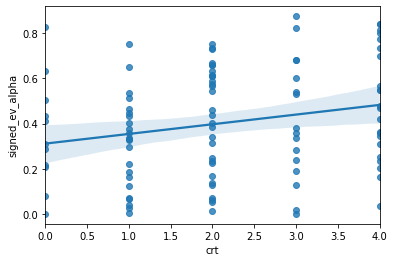

In [211]:
sns.regplot(x=df['crt'], y=df['signed_ev_alpha'])

<AxesSubplot:xlabel='signed_ev_alpha', ylabel='crt'>

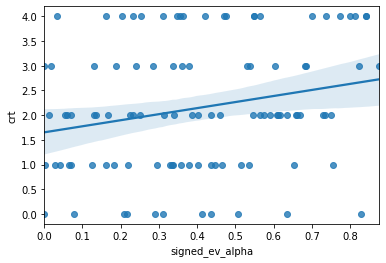

In [212]:
sns.regplot(y=df['crt'], x=df['signed_ev_alpha'])

<AxesSubplot:xlabel='crt', ylabel='signed_ev_alpha'>

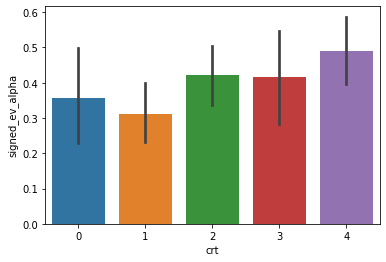

In [235]:
sns.barplot(x=df['crt'], y=df['signed_ev_alpha'])

In [54]:
pearsonr(df['crt'], df['signed_ev_prior'])

(-0.17896711825693914, 0.07189805630527164)

<AxesSubplot:xlabel='crt', ylabel='signed_ev_prior'>

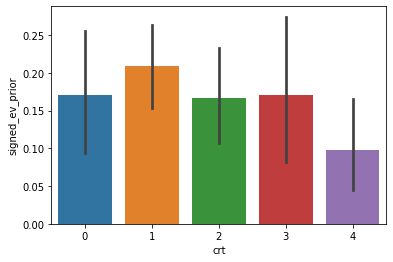

In [236]:
sns.barplot(x=df['crt'], y=df['signed_ev_prior'])

In [55]:
pearsonr(df['crt'], df['col_congruency_alpha'])

(-0.03864198175813178, 0.6997935862403302)

In [56]:
pearsonr(df['crt'], df['age'])

(0.11039546371363107, 0.26934225835134695)

In [57]:
pearsonr(df['crt'], df['gender'])

(-0.2672266741501584, 0.00662440746426988)

[Text(0, 0, 'non-binary'), Text(1, 0, 'male'), Text(2, 0, 'female')]

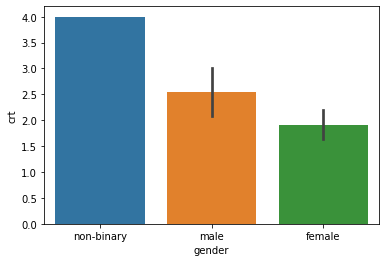

In [219]:
p = sns.barplot(x=df['gender'], y=df['crt'])
p.set_xticklabels(['non-binary', 'male', 'female'])

In [58]:
pearsonr(df['crt'], df['ed_lev'])

(0.12041074895626465, 0.22801309253950708)

In [59]:
pearsonr(df['crt'], df['lie_detect_accuracy'])

(0.00429081466698682, 0.9658600000460413)

In [60]:
pearsonr(df['crt'], df['lie_detect_precision'])

(0.10269671841564773, 0.30436309948343854)

In [61]:
pearsonr(df['crt'], df['lie_prop'])

(0.03554308257017231, 0.7228476785694421)

In [62]:
pearsonr(df['eq'], df['signed_ev_alpha'])

(0.0014155505596288517, 0.9887341097642971)

In [63]:
pearsonr(df['eq'], df['signed_ev_prior'])

(0.005935224723537866, 0.9527891647217767)

In [64]:
pearsonr(df['eq'], df['col_congruency_alpha'])

(0.08663521222414755, 0.38658967377613895)

In [65]:
pearsonr(df['eq'], df['age'])

(0.0030894984504916626, 0.9754147503940251)

In [66]:
pearsonr(df['eq'], df['gender'])

(0.1740424650231689, 0.08021199247150117)

[Text(0, 0, 'non-binary'), Text(1, 0, 'male'), Text(2, 0, 'female')]

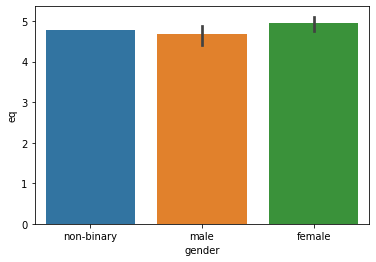

In [220]:
p = sns.barplot(x=df['gender'], y=df['eq'])
p.set_xticklabels(['non-binary', 'male', 'female'])

In [67]:
pearsonr(df['eq'], df['ed_lev'])

(-0.1199723220643277, 0.22972347162616374)

In [68]:
pearsonr(df['eq'], df['lie_detect_accuracy'])

(-0.031091990094337895, 0.7563946951742223)

In [69]:
pearsonr(df['eq'], df['lie_detect_precision'])

(-0.026663718258246098, 0.7902247576207552)

In [70]:
pearsonr(df['eq'], df['lie_prop'])

(-0.13775290812049404, 0.16737686284589615)

In [71]:
pearsonr(df['aq'], df['signed_ev_alpha'])

(0.012444693223231879, 0.9012036206083979)

In [72]:
pearsonr(df['aq'], df['signed_ev_prior'])

(0.0640560324004845, 0.5224207149252059)

In [73]:
pearsonr(df['aq'], df['col_congruency_alpha'])

(-0.002992437122738347, 0.9761869041054846)

In [74]:
pearsonr(df['aq'], df['age'])

(-0.27765687345684836, 0.00472193365736212)

<AxesSubplot:xlabel='age', ylabel='aq'>

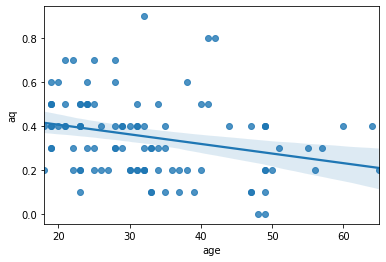

In [222]:
sns.regplot(y=df['aq'], x=df['age'])

In [75]:
pearsonr(df['aq'], df['gender'])

(0.07498281885206927, 0.45385032238158923)

In [76]:
pearsonr(df['aq'], df['ed_lev'])

(-0.06367754654316359, 0.5248863236853252)

In [77]:
pearsonr(df['aq'], df['lie_detect_accuracy'])

(-0.04604249238551919, 0.6458613617494736)

In [78]:
pearsonr(df['aq'], df['lie_detect_precision'])

(0.12103632742686458, 0.22558810492609688)

In [79]:
pearsonr(df['aq'], df['lie_prop'])

(0.027810825960911466, 0.7814210984489044)

In [80]:
pearsonr(df['mean_honesty_rating'], df['signed_ev_alpha']) #change

(-0.22756255335976433, 0.02143629315419659)

<AxesSubplot:xlabel='signed_ev_alpha', ylabel='mean_honesty_rating'>

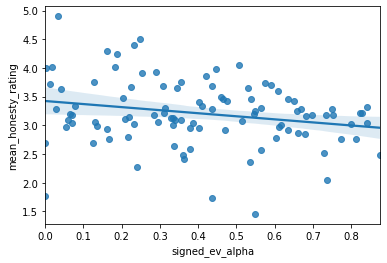

In [223]:
sns.regplot(x=df['signed_ev_alpha'], y=df['mean_honesty_rating'])

In [81]:
pearsonr(df['mean_honesty_rating'], df['signed_ev_prior'])

(-0.45578570527204604, 1.48080117490401e-06)

<AxesSubplot:xlabel='signed_ev_prior', ylabel='mean_honesty_rating'>

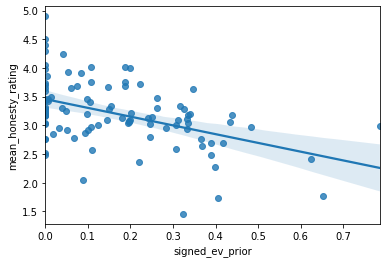

In [224]:
sns.regplot(x=df['signed_ev_prior'], y=df['mean_honesty_rating'])

In [82]:
pearsonr(df['mean_honesty_rating'], df['col_congruency_alpha'])

(0.024969408834780424, 0.8032760726926987)

In [83]:
pearsonr(df['mean_honesty_rating'], df['age'])

(0.26178931211013146, 0.007863405155154504)

<AxesSubplot:xlabel='age', ylabel='mean_honesty_rating'>

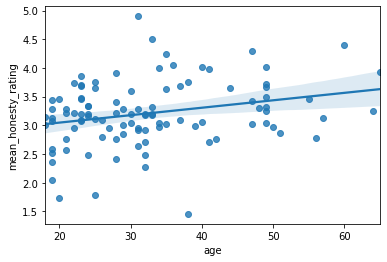

In [225]:
sns.regplot(x=df['age'], y=df['mean_honesty_rating'])

In [84]:
pearsonr(df['mean_honesty_rating'], df['gender'])

(0.1457801650750658, 0.1437454650178755)

In [85]:
pearsonr(df['mean_honesty_rating'], df['ed_lev'])

(-0.021656530636644956, 0.8289488239940235)

In [86]:
pearsonr(df['mean_honesty_rating'], df['lie_detect_accuracy'])

(0.5963813984317203, 3.743845371037477e-11)

<AxesSubplot:xlabel='lie_detect_accuracy', ylabel='mean_honesty_rating'>

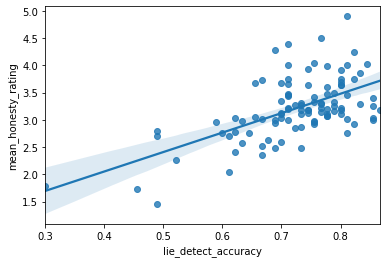

In [226]:
sns.regplot(x=df['lie_detect_accuracy'], y=df['mean_honesty_rating'])

In [87]:
pearsonr(df['mean_honesty_rating'], df['lie_detect_precision'])

(0.006646637184905574, 0.9471380683916681)

In [88]:
pearsonr(df['mean_honesty_rating'], df['lie_prop']) #change

(-0.2862735373915785, 0.0035353450941274624)

<AxesSubplot:xlabel='lie_prop', ylabel='mean_honesty_rating'>

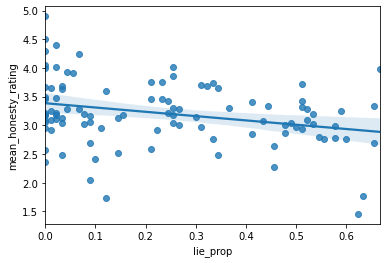

In [227]:
sns.regplot(x=df['lie_prop'], y=df['mean_honesty_rating'])

In [89]:
pearsonr(df['lie_prop'], df['signed_ev_alpha']) #change

(0.20356402015904684, 0.04016021748041549)

<AxesSubplot:xlabel='lie_prop', ylabel='signed_ev_alpha'>

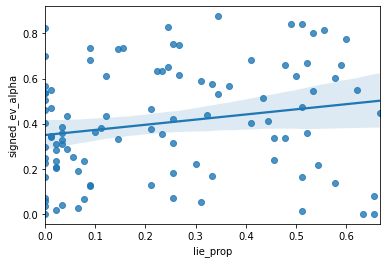

In [248]:
sns.regplot(y=df['signed_ev_alpha'], x=df['lie_prop'])

In [229]:
spearmanr(df['lie_prop'], df['signed_ev_alpha'])

SpearmanrResult(correlation=0.21917403451734685, pvalue=0.026880248904813848)

In [90]:
pearsonr(df['lie_prop'], df['signed_ev_prior'])

(0.06652855607209676, 0.5064591962230764)

In [91]:
pearsonr(df['lie_prop'], df['col_congruency_alpha'])

(-0.09343694830191036, 0.3502615006919804)

In [92]:
pearsonr(df['lie_prop'], df['age'])

(0.03187930959315926, 0.7504257495918073)

In [93]:
pearsonr(df['lie_prop'], df['gender'])

(-0.22785184969782388, 0.021266796714607857)

[Text(0, 0, 'non-binary'), Text(1, 0, 'male'), Text(2, 0, 'female')]

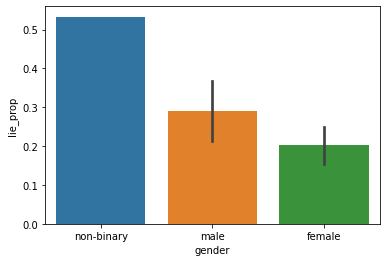

In [247]:
p = sns.barplot(x=df['gender'], y=df['lie_prop'])
p.set_xticklabels(['non-binary', 'male', 'female'])

In [94]:
pearsonr(df['lie_prop'], df['ed_lev'])

(0.14387584165616463, 0.14910953005078528)

In [95]:
pearsonr(df['lie_prop'], df['lie_detect_accuracy'])

(-0.2706655366745977, 0.005933130971726585)

<AxesSubplot:xlabel='lie_prop', ylabel='lie_detect_accuracy'>

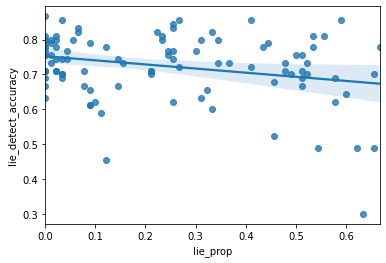

In [231]:
sns.regplot(x=df['lie_prop'], y=df['lie_detect_accuracy'])

In [96]:
pearsonr(df['lie_prop'], df['lie_detect_precision'])

(-0.02116343425411084, 0.8327861511877311)

### paranoia

In [233]:
tmp = df.dropna()

In [98]:
pearsonr(tmp['rgpts'], tmp['signed_ev_alpha'])

(0.026744867763944732, 0.7937760343285415)

In [99]:
pearsonr(tmp['rgpts'], tmp['signed_ev_prior'])

(0.10948680837007296, 0.2831869385151305)

In [100]:
pearsonr(tmp['rgpts'], tmp['col_congruency_alpha'])

(0.022779819298251465, 0.8238124519429222)

In [101]:
pearsonr(tmp['rgpts'], tmp['lie_prop'])

(-0.050359872315241874, 0.6223988337744883)

In [102]:
pearsonr(tmp['rgpts'], tmp['lie_detect_accuracy'])

(0.02941357897138958, 0.7737250756173382)

In [103]:
pearsonr(tmp['rgpts'], tmp['lie_detect_precision'])

(-0.07008800940978893, 0.4928533609560655)

In [104]:
pearsonr(tmp['rgpts'], tmp['lie_detect_recall'])

(0.13477705133892676, 0.18578490851390483)

In [105]:
pearsonr(tmp['rgpts'], tmp['gender'])

(0.0872624803758146, 0.3928822030601391)

In [106]:
pearsonr(tmp['rgpts'], tmp['age'])

(-0.3565880242046959, 0.0003133778984501622)

<AxesSubplot:xlabel='rgpts', ylabel='age'>

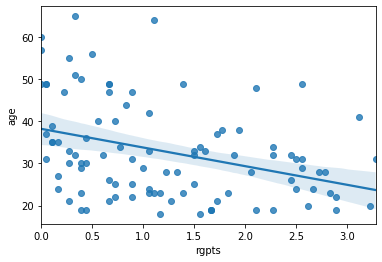

In [234]:
sns.regplot(x=tmp['rgpts'], y=tmp['age'])

In [107]:
pearsonr(tmp['rgpts'], tmp['ed_lev'])

(-0.07210873933913274, 0.4804366610629778)

## Optimal lie detection subjects: parameter estimates

In [249]:
import numpy as np

In [250]:
import json

In [251]:
with open("./data/fr/fr_topup_fit_sig_col_count_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res1 = json.load(f)

In [252]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res1[uuid]['est_prior'])
    param2.append(res1[uuid]['est_alpha'])
    R2.append(res1[uuid]['R2'])
#     param1.append(res1[uuid]['est_alpha1'])

In [253]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.044060735727119625 SD 0.05935302632345131


In [254]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.46932450885841953 SD 0.16602570199159492


In [255]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.07693275362651064 SD 0.0473252654751147


In [256]:
with open("./data/fr/fr_topup_fit_unsig_col_count_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res2 = json.load(f)

In [257]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
    param1.append(res2[uuid]['est_prior'])
    param2.append(res2[uuid]['est_alpha'])
    R2.append(res2[uuid]['R2'])

In [258]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.14681351541264168 SD 0.07933231088324856


In [259]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.2498069061148547 SD 0.2173695559690224


In [260]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.02086795767076762 SD 0.027027657065486706


In [261]:
with open("./data/fr/fr_topup_fit_sig_ev_noup_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res3 = json.load(f)

In [262]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res3[uuid]['est_prior'])
    param2.append(res3[uuid]['est_alpha'])
    R2.append(res3[uuid]['R2'])
#     param1.append(res1[uuid]['est_alpha1'])

In [263]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.000509110009992829 SD 0.004675702473361887


In [264]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.4336944900746509 SD 0.09674860280506747


In [265]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.17691902778387447 SD 0.05608904981887626


In [266]:
with open("./data/fr/fr_topup_fit_unsig_ev_noup_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res4 = json.load(f)

In [267]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res4[uuid]['est_prior'])
    param2.append(res4[uuid]['est_alpha'])
    R2.append(res4[uuid]['R2'])
#     param1.append(res1[uuid]['est_alpha1'])

In [268]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.00017545594135906804 SD 0.0018897183212190167


In [269]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.45978792128179974 SD 0.10253941289317922


In [270]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.1791132351856347 SD 0.05608495772828776


In [271]:
with open("./data/fr/fr_topup_fit_unsig_ev_up_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res5 = json.load(f)

In [272]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res5[uuid]['est_prior'])
    param2.append(res5[uuid]['est_alpha'])
    R2.append(res5[uuid]['R2'])
#     param1.append(res1[uuid]['est_alpha1'])

In [273]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.2060727146015208 SD 0.06638490668563761


In [274]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.05279190263414056 SD 0.07281016424157724


In [275]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.0037078819515152196 SD 0.007088795967883364


In [313]:
with open("./data/fr/fr_topup_fit_sig_ev_up_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res5 = json.load(f)

In [314]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res5[uuid]['est_prior'])
    param2.append(res5[uuid]['est_alpha'])
    R2.append(res5[uuid]['R2'])
#     param1.append(res1[uuid]['est_alpha1'])

In [315]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.20030069300280004 SD 0.06865802375441633


In [316]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.06526127195809496 SD 0.08433694069991504


In [317]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.00452469430158838 SD 0.008393749308431104


In [276]:
with open("./data/fr/fr_topup_fit_combi_signed_ev_col_congr_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res4 = json.load(f)

In [278]:
param1 = []
param2 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res4[uuid]['est_prior'])
    param2.append(res4[uuid]['est_alpha1'])
    R2.append(res4[uuid]['R2'])

In [279]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.010909463099167868 SD 0.03372931567525545


In [280]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean -0.1497945554252826 SD 0.07938700131052923


In [281]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.23072556785156248 SD 0.07999821728231635


In [282]:
with open("./data/fr/fr_topup_fit_combi_signed_ev_subj_lied_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res5 = json.load(f)

In [283]:
param1 = []
param2 = []
param3 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res5[uuid]['est_prior'])
    param2.append(res5[uuid]['est_alpha1'])
    param3.append(res5[uuid]['est_alpha2'])
    R2.append(res5[uuid]['R2'])

In [284]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.0005007531559870314 SD 0.00539327654536579


In [285]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean -0.010578573387043773 SD 0.22222148442578218


In [286]:
print("alpha estimate", "mean", sum(param3)/len(param3),
     "SD", np.std(param3))

alpha estimate mean 0.44165217385963174 SD 0.10574256371475615


In [287]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.18450733364545058 SD 0.05904374871451978


In [288]:
with open("./data/fr/fr_topup_fit_weighted_sigev_sigcolourt_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res6 = json.load(f)

In [289]:
param1 = []
param2 = []
param3 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res6[uuid]['est_prior'])
    param2.append(res6[uuid]['est_alpha1'])
    param3.append(res6[uuid]['est_alpha2'])
    R2.append(res6[uuid]['R2'])

In [290]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.0005255534856750303 SD 0.004644731165283259


In [291]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.416658201508045 SD 0.09950148713906008


In [292]:
print("alpha estimate", "mean", sum(param3)/len(param3),
     "SD", np.std(param3))

alpha estimate mean 0.02874078074126795 SD 0.07297154985480103


In [293]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.17772340606471107 SD 0.055957020757208376


In [300]:
with open("./data/fr/fr_topup_fit_signed_ev_colcongr_subjlied_perfect_lie_detector.json", "r", encoding="utf-8") as f:
    res6 = json.load(f)

In [307]:
param1 = []
param2 = []
param3 = []
param4 = []
R2 = []

for uuid in res1:
#     print(uuid)
    param1.append(res6[uuid]['est_prior'])
    param2.append(res6[uuid]['est_alpha1'])
    param3.append(res6[uuid]['est_alpha2'])
    param4.append(res6[uuid]['est_alpha3'])
    R2.append(res6[uuid]['R2'])

In [308]:
print("prior estimnate", "mean", sum(param1)/len(param1),
     "SD", np.std(param1))

prior estimnate mean 0.011230637069525025 SD 0.03516985435532152


In [309]:
print("alpha estimate", "mean", sum(param2)/len(param2),
     "SD", np.std(param2))

alpha estimate mean 0.5274737985718209 SD 0.12558586449072023


In [310]:
print("alpha estimate", "mean", sum(param3)/len(param3),
     "SD", np.std(param3))

alpha estimate mean -0.1488103577975231 SD 0.07985599873647838


In [311]:
print("alpha estimate", "mean", sum(param4)/len(param4),
     "SD", np.std(param4))

alpha estimate mean -0.024147794540656024 SD 0.2303343574363572


In [312]:
print("R2 range", "mean", sum(R2)/len(R2),
     "SD", np.std(R2))

R2 range mean 0.23702265093312985 SD 0.08182610708342347


## Check distribution properties of expectation violations per subject

In [165]:
df_long = pd.read_feather("./data/fr/fr100_data_long.feather")

In [166]:
df6_long = pd.read_feather("./data/fr/fr_batch6_data_long_processed.feather")

In [168]:
len(set(df_long['e_v'])) == len(set(df_long['t_cond']))

True

In [169]:
len(set(df6_long['e_v'])) == len(set(df6_long['t_cond']))

True

In [170]:
df_long = pd.concat([df_long, df6_long])

In [171]:
list(df6_long)

['index',
 'PID',
 'n_red',
 'outcome',
 'col_reported',
 'col_picked',
 'pp_lied',
 'RT_rating',
 'win_lose_tie',
 'suspicion_rating',
 'trial',
 'n_blue',
 'e_v',
 'normed_signed_e_v',
 'normed_unsigned_e_v',
 'cs_signed_e_v',
 'normed_cs_signed_e_v',
 'cs_unsigned_e_v',
 'normed_cs_unsigned_e_v',
 'n_reported_colour_opp',
 'n_consec_colour',
 'normed_signed_colour_count',
 'normed_unsigned_colour_count',
 'outcome_same_as_pick',
 'subject_lied',
 't_cond',
 'signed_n_consec_colour']

In [172]:
df_long = df_long.set_index('PID')

In [173]:
del df_long['index']

In [174]:
df_long.shape

(10530, 25)

In [176]:
import seaborn as sns

In [204]:
uuids = set(df.index)

In [205]:
len(uuids)

102

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

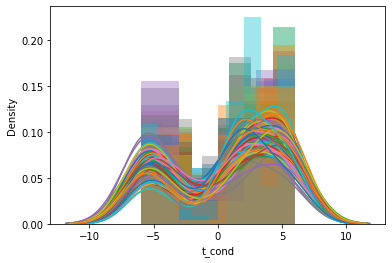

In [179]:
game_props = {}

for uuid in uuids:
    tmp = df_long.loc[uuid]
    sns.distplot(tmp['t_cond'])
    game_props[uuid] = {
        "ev_sd": tmp['t_cond'].std(),
        "n_blue_outcome": len(tmp[tmp['outcome'] == 1])
    }

In [180]:
game_props

{'5a455b091950a80001e7c49a': {'ev_sd': 4.108758648054792,
  'n_blue_outcome': 56},
 '59430640f154200001b509d0': {'ev_sd': 4.25269247164981, 'n_blue_outcome': 57},
 '61470c6545addee0f7b14363': {'ev_sd': 4.4967598266781454,
  'n_blue_outcome': 62},
 '614f0cfd6a0b72631a010f7a': {'ev_sd': 4.4164599626564955,
  'n_blue_outcome': 53},
 '5ef7d6c359b38851de122110': {'ev_sd': 4.391513777551763,
  'n_blue_outcome': 56},
 '5e6d395882be80000cec9f92': {'ev_sd': 4.595783227118276,
  'n_blue_outcome': 56},
 '60f9c455fbb032d20d4f88ee': {'ev_sd': 4.605389558307775,
  'n_blue_outcome': 57},
 '615f1500b60d25e2660e8644': {'ev_sd': 4.2267207784907965,
  'n_blue_outcome': 52},
 '615875cd00a23fb41e865fc0': {'ev_sd': 4.393119691542643,
  'n_blue_outcome': 56},
 '613bea209464d339e18036d4': {'ev_sd': 4.581472213213722,
  'n_blue_outcome': 55},
 '5f96efef011b8c01fd34a9eb': {'ev_sd': 4.403550944844989,
  'n_blue_outcome': 55},
 '5d230886d7533000017a4409': {'ev_sd': 4.628913635853424,
  'n_blue_outcome': 52},
 '5c

In [181]:
tmp = pd.DataFrame.from_records(game_props).transpose()

In [184]:
tmp.dropna() == tmp

,ev_sd,n_blue_outcome
55b424e1fdf99b526efcf8d0,True,True
56210effed6e5a000ac7f3a5,True,True
57313ba2070de6000f43384e,True,True
583accd26ab9a70001e2b5a7,True,True
59430640f154200001b509d0,True,True
...,...,...
616d53892b58b6e0388ab050,True,True
616f35805cb9047a629edb71,True,True
61701030a25961434f04b486,True,True
617019b7cfb4582eb9443d6e,True,True


In [186]:
df_ultimate = df.join(tmp)

In [187]:
from scipy.stats import pearsonr

In [188]:
pearsonr(df_ultimate['ev_sd'], df_ultimate['signed_ev_alpha'])

(0.002728524705798367, 0.978286520326416)

In [189]:
pearsonr(df_ultimate['ev_sd'], df_ultimate['signed_ev_prior'])

(0.024764640440861067, 0.804857153150842)

In [190]:
pearsonr(df_ultimate['ev_sd'], df_ultimate['col_congruency_alpha'])

(-0.11997805699655302, 0.229701040801958)

In [191]:
pearsonr(df_ultimate['n_blue_outcome'], df_ultimate['signed_ev_alpha']) #change

(0.11919230059885197, 0.23278865123344167)

In [192]:
pearsonr(df_ultimate['n_blue_outcome'], df_ultimate['signed_ev_prior']) #change

(-0.16014752421373726, 0.10786302294998568)

In [193]:
pearsonr(df_ultimate['n_blue_outcome'], df_ultimate['col_congruency_alpha']) #change

(0.1504323501553962, 0.13125540107385664)

In [195]:
df_ultimate

,crt,aq,lie_prop,eq,rgpts,signed_ev_alpha,col_congruency_alpha,signed_ev_prior,mean_honesty_rating,lie_detect_precision,...,age,gender,ed_lev,high_liar,high_alpha,high_col_congruency_alpha,high_prior,specificity,ev_sd,n_blue_outcome
PID,,,,,,,,,,,,,,,,,,,,,
56210effed6e5a000ac7f3a5,4,0.2,0.622222,5.181818,1.777778,0.549441,0.022603,0.324423,1.455556,0.391892,...,38,0,5,True,True,True,True,0.250000,4.086456,67.0
57313ba2070de6000f43384e,3,0.6,0.211111,4.954545,1.944444,0.129086,-0.040522,0.187498,3.755556,0.750000,...,38,1,1,False,False,True,True,0.983871,3.837459,70.0
5af196e1e1b5b8000148ac76,2,0.4,0.222222,5.136364,2.500000,0.634702,-0.038728,0.051418,2.922222,0.692308,...,31,0,9,True,True,True,False,0.875000,4.279105,66.0
5cd5fe480f0de600018e7251,1,0.3,0.411111,4.681818,2.722222,0.402318,-0.022349,0.105137,3.400000,0.000000,...,28,1,3,True,True,True,False,0.905882,4.285446,50.0
5fec7577ad8fbadf15cd5607,4,0.2,0.233333,4.500000,NaN,0.356174,-0.085010,0.108129,3.755556,0.230769,...,25,0,6,True,False,False,False,0.873418,4.333823,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60fd39ffad4645e77e6afdb1,4,0.7,0.555556,3.818182,0.666667,0.813715,-0.112773,0.000000,2.755556,0.558824,...,21,1,5,True,True,False,False,0.782609,4.703758,56.0
61243bd7b3bc114f04400657,1,0.3,0.000000,4.954545,2.277778,0.001867,0.000574,0.199030,4.000000,0.000000,...,34,1,4,False,False,True,True,1.000000,4.356177,62.0
61470c6545addee0f7b14363,1,0.2,0.255556,5.181818,0.333333,0.753926,-0.147546,0.000000,3.177778,0.464286,...,32,1,3,True,True,False,False,0.782609,4.496760,62.0


C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ev_sd', ylabel='Density'>

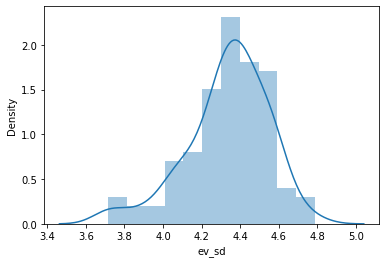

In [198]:
sns.distplot(df_ultimate['ev_sd'])

C:\Users\Sarah Zheng\.conda\envs\sim-test\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_blue_outcome', ylabel='Density'>

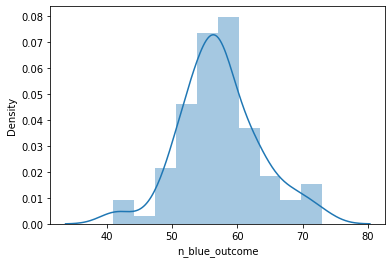

In [199]:
sns.distplot(df_ultimate['n_blue_outcome'])

In [201]:
df_ultimate.corr().to_clipboard()

In [328]:
df.reset_index().to_feather("./data/fr/fr_topup_clean_aggregate.feather")

In [357]:
df['cat_lie_prop'] = np.where(df['lie_prop'] < 0.1, 0, np.where(df['lie_prop'] < .5, 1, 2))

<AxesSubplot:xlabel='cat_lie_prop', ylabel='crt'>

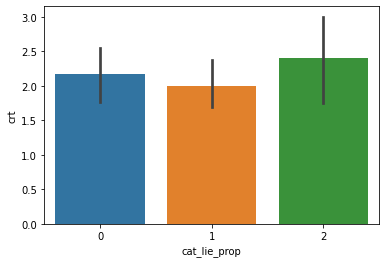

In [358]:
sns.barplot(x=df['cat_lie_prop'], y=df['crt'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='signed_ev_alpha'>

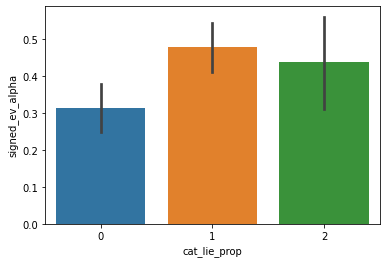

In [350]:
sns.barplot(x=df['cat_lie_prop'], y=df['signed_ev_alpha'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='signed_ev_prior'>

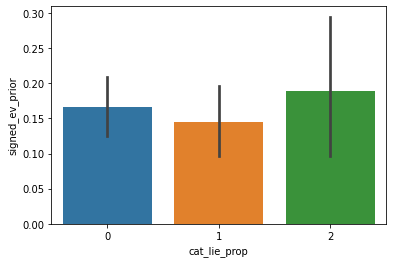

In [351]:
sns.barplot(x=df['cat_lie_prop'], y=df['signed_ev_prior'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='col_congruency_alpha'>

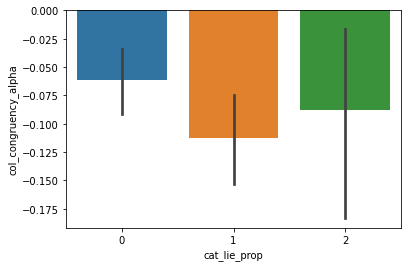

In [352]:
sns.barplot(x=df['cat_lie_prop'], y=df['col_congruency_alpha'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='age'>

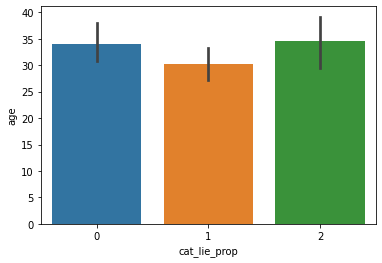

In [359]:
sns.barplot(x=df['cat_lie_prop'], y=df['age'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='gender'>

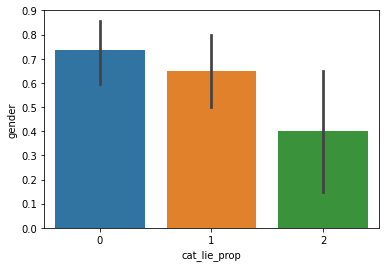

In [360]:
sns.barplot(x=df['cat_lie_prop'], y=df['gender'])

<AxesSubplot:xlabel='cat_lie_prop', ylabel='ed_lev'>

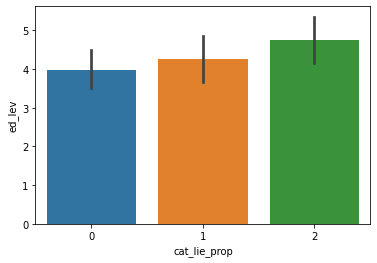

In [362]:
sns.barplot(x=df['cat_lie_prop'], y=df['ed_lev'])

In [363]:
pearsonr(df['ed_lev'], df['gender'])

(-0.2059920531832954, 0.037791469458696665)

In [2]:
import pandas as pd

In [79]:
df=pd.read_feather("./data/fr/fr_topup_clean_aggregate.feather")

In [82]:
df=df.set_index("PID")

In [89]:
list(df)

['crt',
 'aq',
 'lie_prop',
 'eq',
 'rgpts',
 'signed_ev_alpha',
 'col_congruency_alpha',
 'signed_ev_prior',
 'mean_honesty_rating',
 'lie_detect_precision',
 'lie_detect_recall',
 'lie_detect_accuracy',
 'age',
 'gender',
 'ed_lev',
 'high_liar',
 'high_alpha',
 'high_col_congruency_alpha',
 'high_prior',
 'specificity',
 'cat_lie_prop']

In [92]:
del df['lie_detect_precision']
del df['lie_detect_recall']
del df['lie_detect_accuracy']
del df['specificity']
del df['cat_lie_prop']

In [90]:
list(lie_df)

['n_subjective_detection',
 'tp',
 'fp',
 'tn',
 'fn',
 'precision',
 'recall',
 'accuracy',
 'f1',
 'specificity',
 'dprime',
 'dprime_hits',
 'dprime_fa']

In [93]:
list(df)

['crt',
 'aq',
 'lie_prop',
 'eq',
 'rgpts',
 'signed_ev_alpha',
 'col_congruency_alpha',
 'signed_ev_prior',
 'mean_honesty_rating',
 'age',
 'gender',
 'ed_lev',
 'high_liar',
 'high_alpha',
 'high_col_congruency_alpha',
 'high_prior']

In [95]:
df.index

Index(['56210effed6e5a000ac7f3a5', '57313ba2070de6000f43384e',
       '5af196e1e1b5b8000148ac76', '5cd5fe480f0de600018e7251',
       '5fec7577ad8fbadf15cd5607', '61085b8ec672d0e88151d5ae',
       '6110e7ae08023ecb9207b05e', '6147d726fa94eb7d5c2de156',
       '614f23537aab4e64abfd53ae', '6152218517a89c5b41e18a06',
       ...
       '5eb2e269f78ab109cca0bf0c', '5eff0ccd02ed424339bf7a08',
       '600092321467ea1431ac2de9', '60526004255ed4f2584df18e',
       '60d103ca47eb561995f29b32', '60fd39ffad4645e77e6afdb1',
       '61243bd7b3bc114f04400657', '61470c6545addee0f7b14363',
       '6157750f00a7484cb199b40d', '615e518ec8ce77798a747260'],
      dtype='object', name='PID', length=102)

In [99]:
tmp = df.join(lie_df)

In [100]:
tmp.shape

(102, 29)

In [105]:
st.pearsonr(tmp['signed_ev_prior'], tmp['crt'])

(-0.17896711825693914, 0.07189805630527164)

In [106]:
tmp.to_clipboard()

In [103]:
tmp.reset_index().to_feather("./data/fr/fr_topup_102_aggregatescores_liedetectacc.feather")

In [6]:
from statistics import median

In [13]:
(df['signed_ev_prior'] > median(df['signed_ev_prior'])) == df['high_prior']

0      True
1      True
2      True
3      True
4      True
       ... 
97     True
98     True
99     True
100    True
101    True
Length: 102, dtype: bool